In [78]:
import CommonFunc

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('resources/co2_emmision_train_data.csv')

df.rename(columns={ 'Engine Size (L)': 'Engine Size(L)',
                    'Fuel Consumption [City (L/100 km)]': 'Fuel Consumption City (L/100 km)',
                    'Fuel Consumption [Hwy (L/100 km)]': 'Fuel Consumption Hwy (L/100 km)',
                    'Fuel Consumption [Comb (L/100 km)]': 'Fuel Consumption Comb (L/100 km)',
                    'CO2 Emissions (g/km)': 'CO2 Emissions(g/km)'
                    }, inplace=True)


df.head()

,Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),...,Range 1 (km),Recharge Time (h),Fuel Type 2,Range 2 (km),Fuel Consumption [City (kWh/100 km)],Fuel Consumption [Comb (kWh/100 km)],Consumption [City (Le/100 km)],Consumption [Hwy (Le/100 km)],Consumption [Comb (Le/100 km)],Range (km)
0,2022.0,Acura,ILX,Compact,2.4,4.0,AM8,Z,9.9,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022.0,Acura,MDX SH-AWD,SUV: Small,3.5,6.0,AS10,Z,12.6,9.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022.0,Acura,MDX Type S,SUV: Standard,3.0,6.0,AS10,Z,13.8,11.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022.0,Acura,NSX,Two-seater,3.5,6.0,AM9,Z,11.1,10.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022.0,Acura,RDX SH-AWD,SUV: Small,2.0,4.0,AS10,Z,11.0,8.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27549 entries, 0 to 27548
Data columns (total 26 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Year                                  27549 non-null  float64
 1   Make                                  27549 non-null  object 
 2   Model                                 27549 non-null  object 
 3   Vehicle Class                         27549 non-null  object 
 4   Engine Size(L)                        27226 non-null  float64
 5   Cylinders                             27226 non-null  float64
 6   Transmission                          27549 non-null  object 
 7   Fuel Type                             27329 non-null  object 
 8   Fuel Consumption City (L/100 km)      27226 non-null  float64
 9   Fuel Consumption Hwy (L/100 km)       27549 non-null  float64
 10  Fuel Consumption Comb (L/100 km)      27226 non-null  float64
 11  Fuel Consumptio

In [80]:
df.duplicated().sum()

804

In [81]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,27549.0,2009.805220,7.771925,1995.0,2004.00,2010.0,2016.0,2022.0
Engine Size(L),27226.0,3.342643,1.340459,0.6,2.20,3.0,4.2,8.4
Cylinders,27226.0,5.830052,1.795808,2.0,4.00,6.0,8.0,16.0
Fuel Consumption City (L/100 km),27226.0,13.841405,3.762936,4.0,11.30,13.4,15.9,33.3
Fuel Consumption Hwy (L/100 km),27549.0,10.152198,2.908910,3.9,8.30,9.6,11.5,35.0
Fuel Consumption Comb (L/100 km),27226.0,12.118200,3.200570,4.0,9.90,11.6,13.9,27.5
Fuel Consumption [Comb (mpg)],27001.0,24.855339,6.693211,10.0,20.00,24.0,28.0,71.0
CO2 Emissions(g/km),27549.0,271.431449,73.451433,0.0,228.00,267.0,313.0,633.0
Motor (kW),548.0,209.905109,171.189660,35.0,80.75,135.0,313.5,829.0
Range 1 (km),225.0,45.133333,34.472297,18.0,27.00,34.0,50.0,203.0


In [82]:
df.describe(include= 'object').T

,count,unique,top,freq
Make,27549,507,CHEVROLET,2056
Model,27549,5435,MUSTANG,112
Vehicle Class,27549,502,COMPACT,3178
Transmission,27549,32,A4,5664
Fuel Type,27329,7,X,14916
Fuel Type 1,225,7,B/Z*,92
Fuel Consumption Combined Le/100 km,225,117,2.7 ([23.2 kWh + 0.1 L]/100 km),8
Fuel Type 2,225,2,Z,147


In [83]:

mask = df['CO2 Emissions(g/km)'] == 0
df = df[~mask]


numdata = pd.DataFrame(df[['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)', 
                           'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
                           'CO2 Emissions(g/km)']])

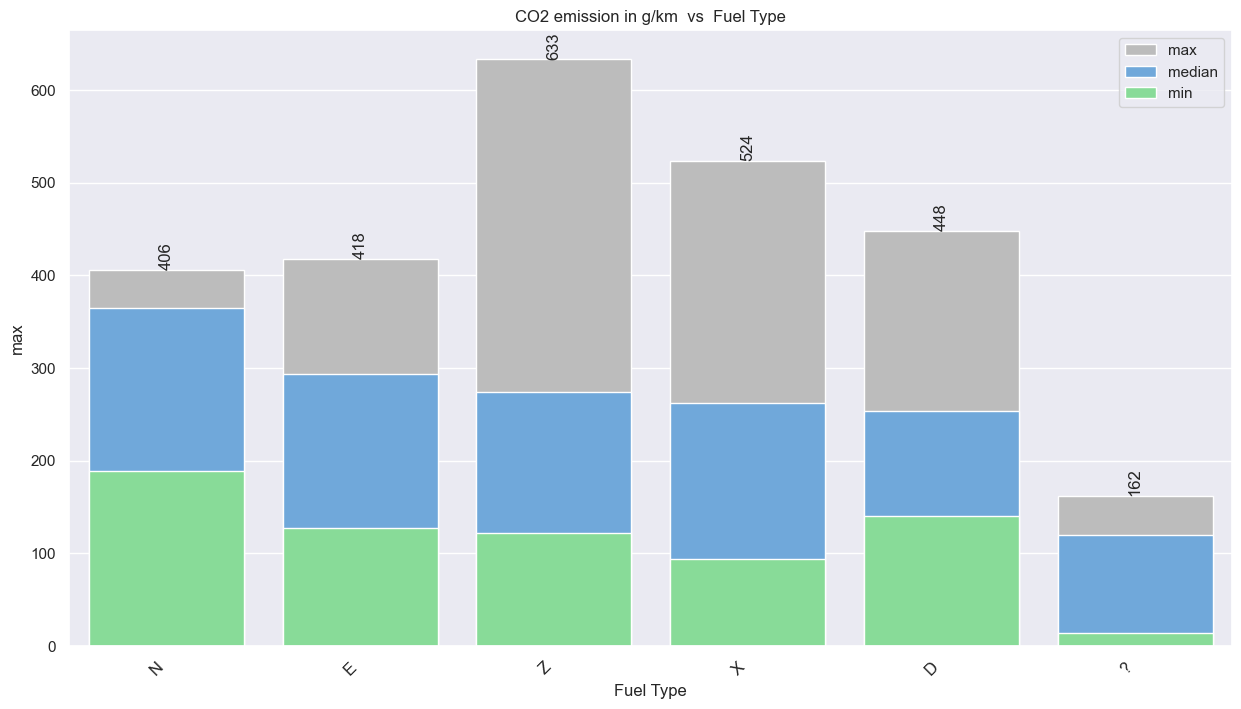

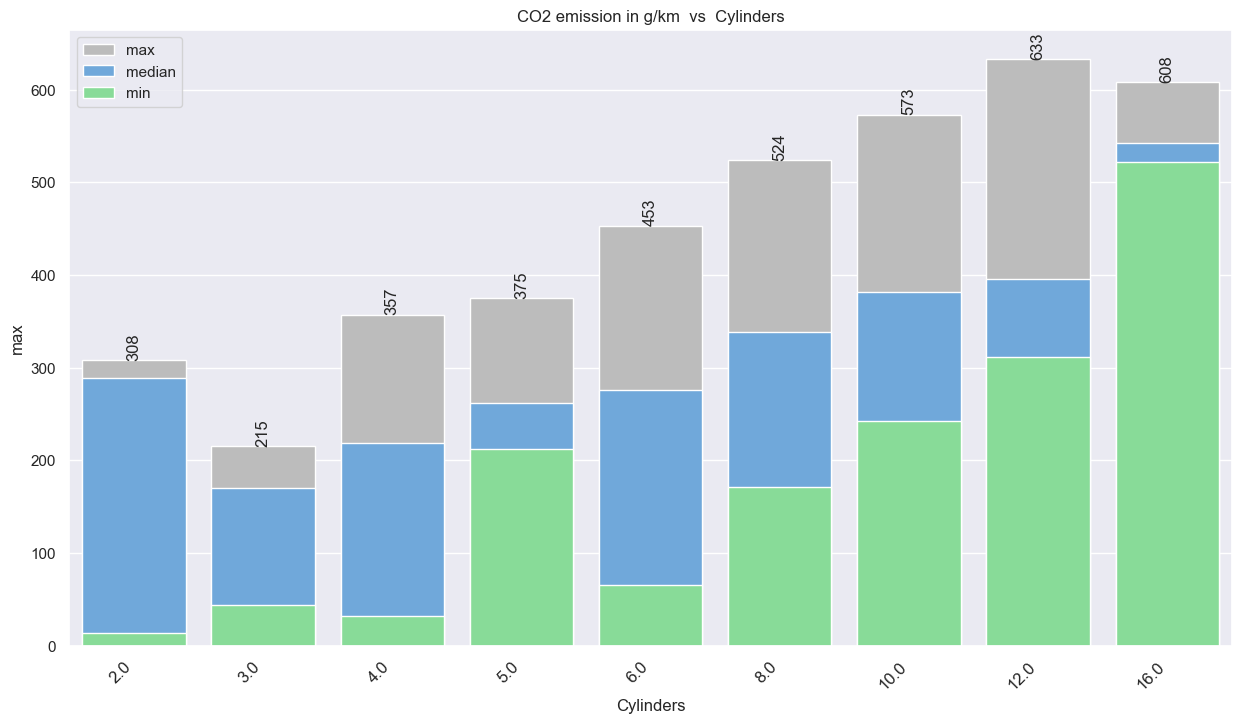

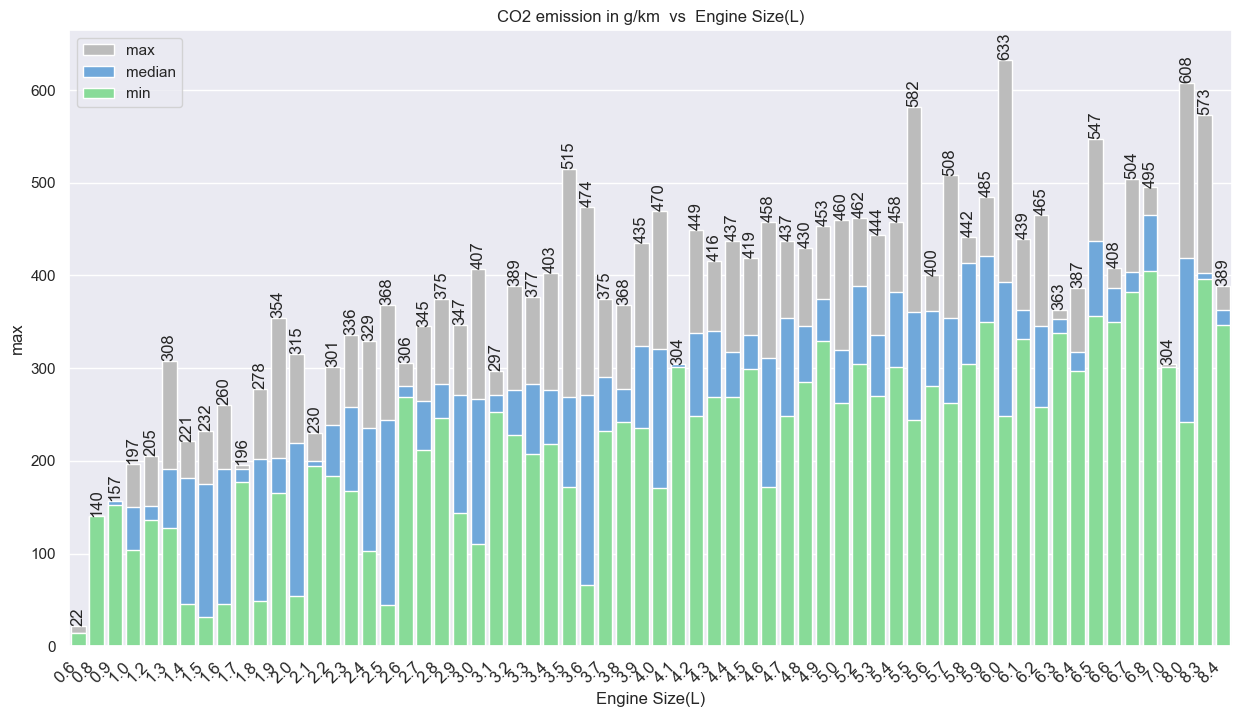

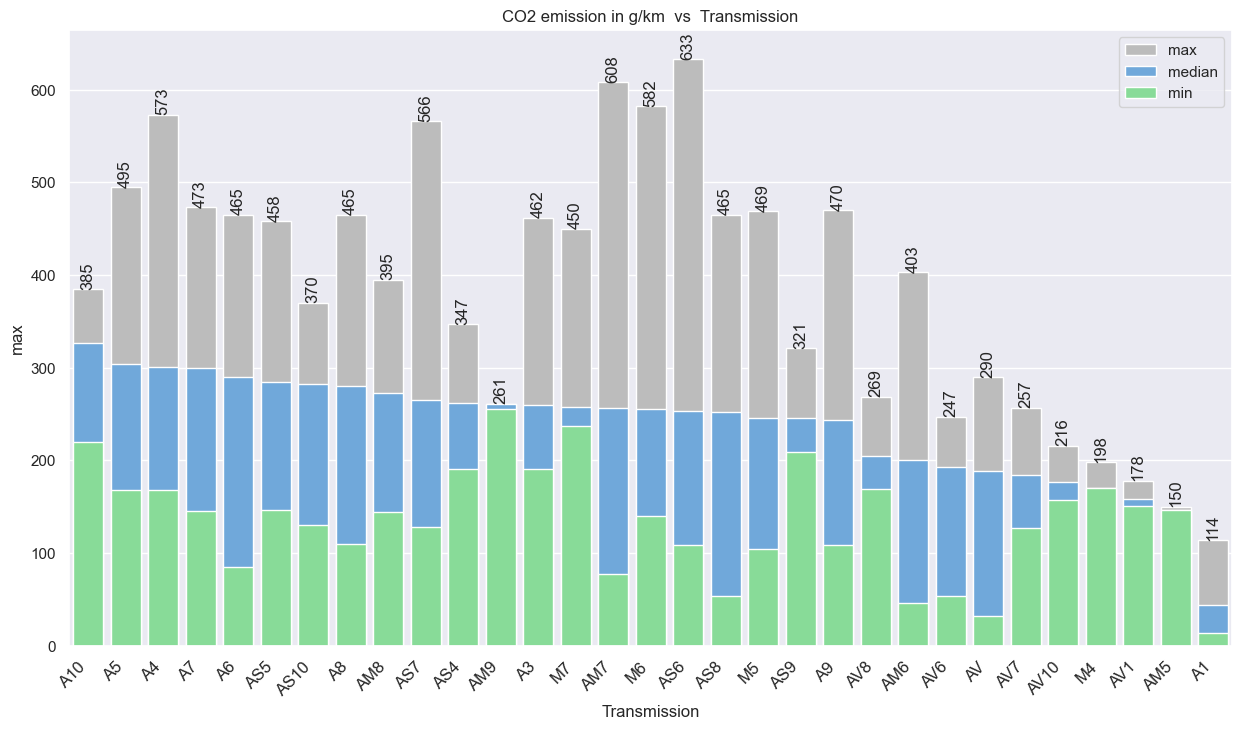

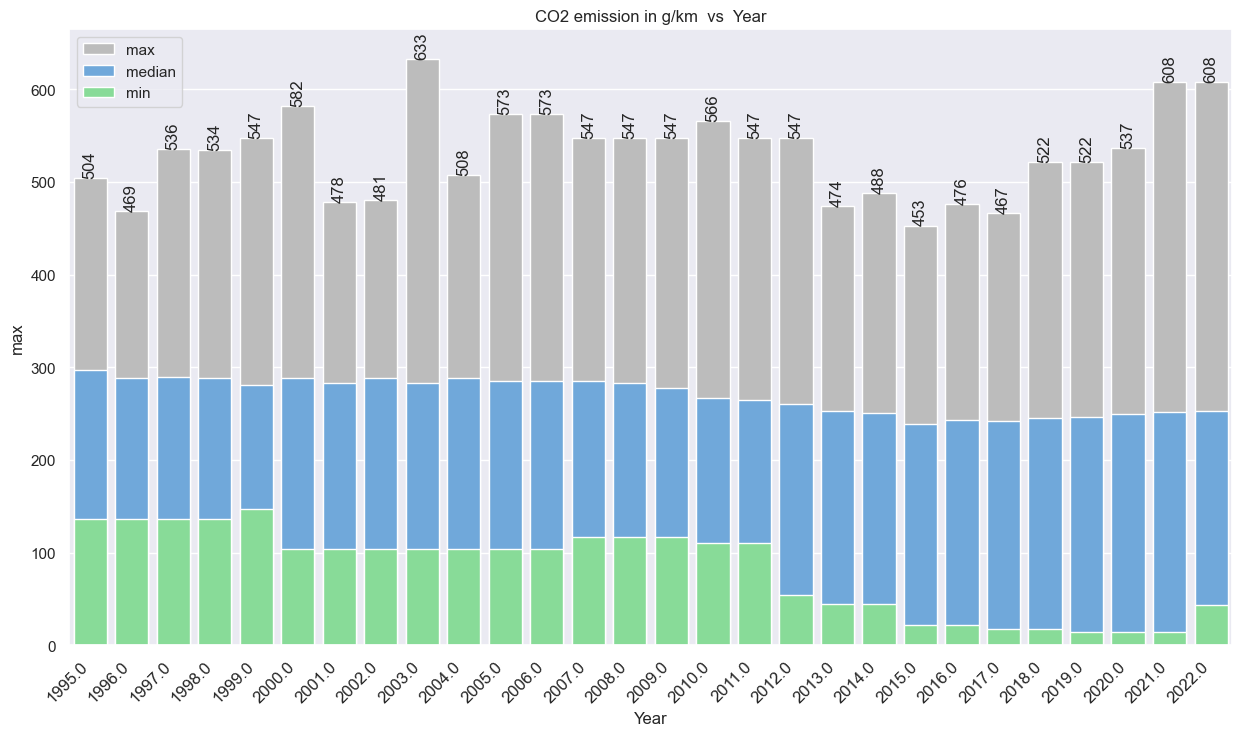

In [93]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#Сравенение мединанного, минимального и максимального значения для выбросов CO2 по разным классам
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

CommonFunc.ShowMedianMinMaxBarPlot('Fuel Type', df)
CommonFunc.ShowMedianMinMaxBarPlot('Cylinders', df)
CommonFunc.ShowMedianMinMaxBarPlot('Engine Size(L)', df)
CommonFunc.ShowMedianMinMaxBarPlot('Transmission', df)
CommonFunc.ShowMedianMinMaxBarPlot('Year', df)

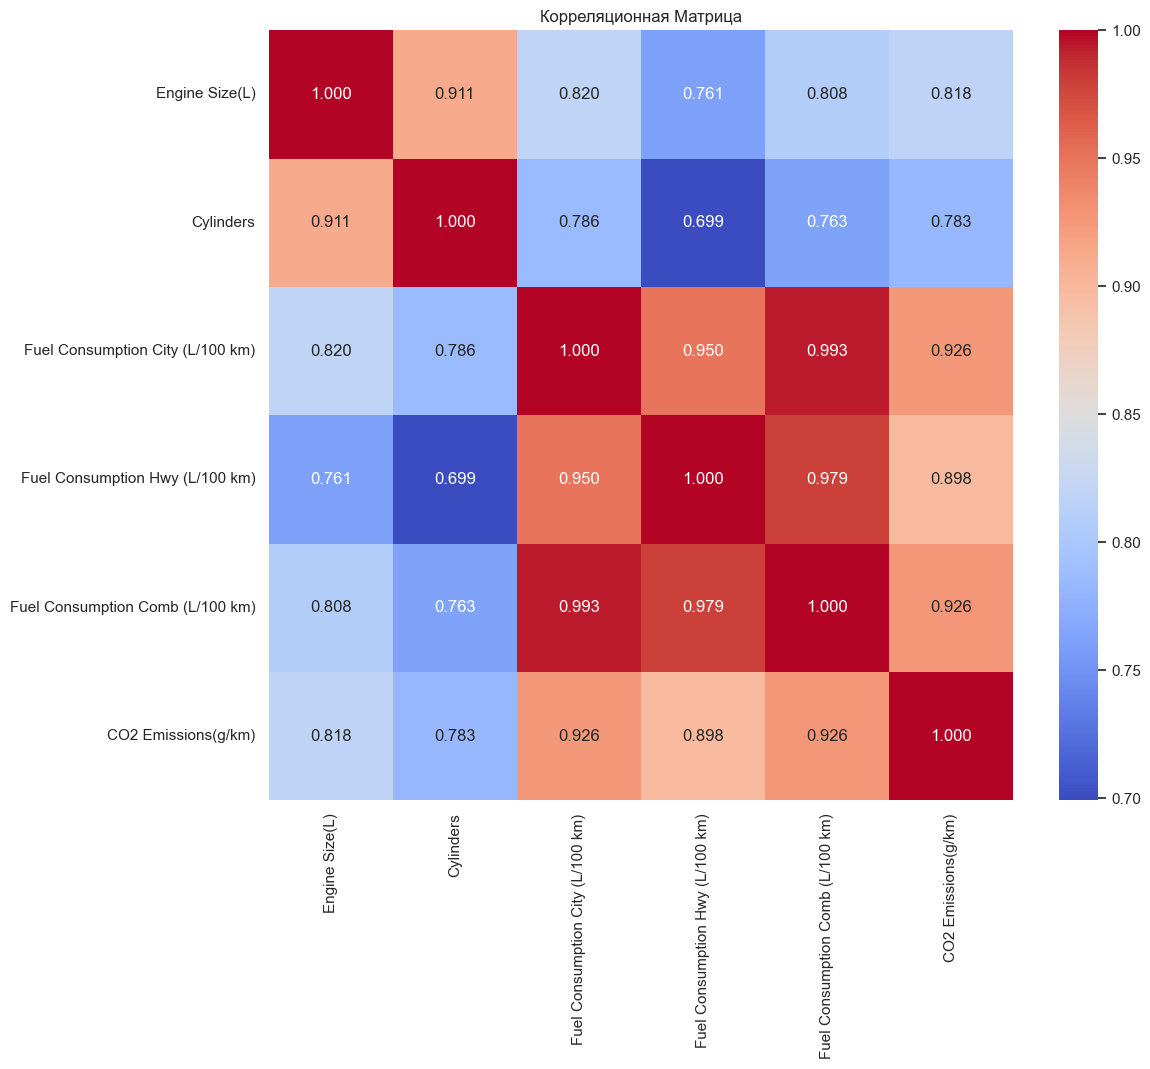

In [85]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#Корреляционная Матрица
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

plt.figure(figsize=(12, 10))
correlation_matrix = numdata.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".3f")
plt.title('Корреляционная Матрица')
plt.show()


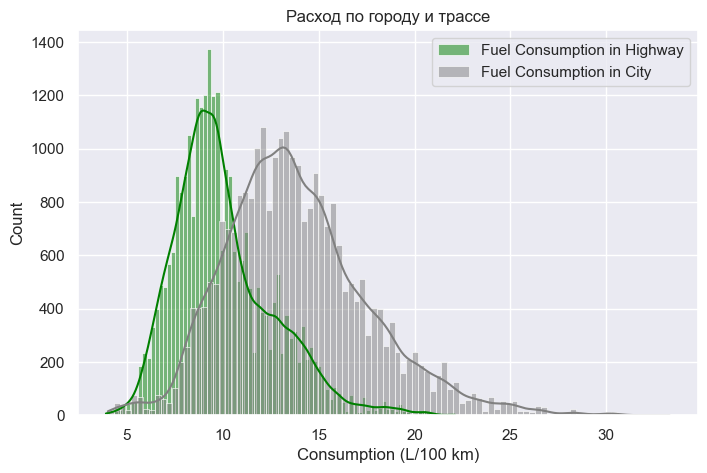

In [86]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#Сравнение расхода топлива по городу и трассе
#City and highway fuel consumption ratings are shown in litres per 100 kilometres (L/100 km) - 
#the combined rating (55% city, 45% hwy) is shown in L/100 km
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

plt.figure(figsize=(8, 5))
sns.histplot(data=df, x="Fuel Consumption Hwy (L/100 km)", kde=True, label = "Fuel Consumption in Highway",color = "green")
sns.histplot(data=df, x="Fuel Consumption City (L/100 km)", kde=True, label = "Fuel Consumption in City", color = "gray")
plt.xlabel('Consumption (L/100 km)')
plt.title(f'Расход по городу и трассе')
plt.legend()
plt.show()

<Axes: xlabel='Fuel Consumption Comb (L/100 km)', ylabel='CO2 Emissions(g/km)'>

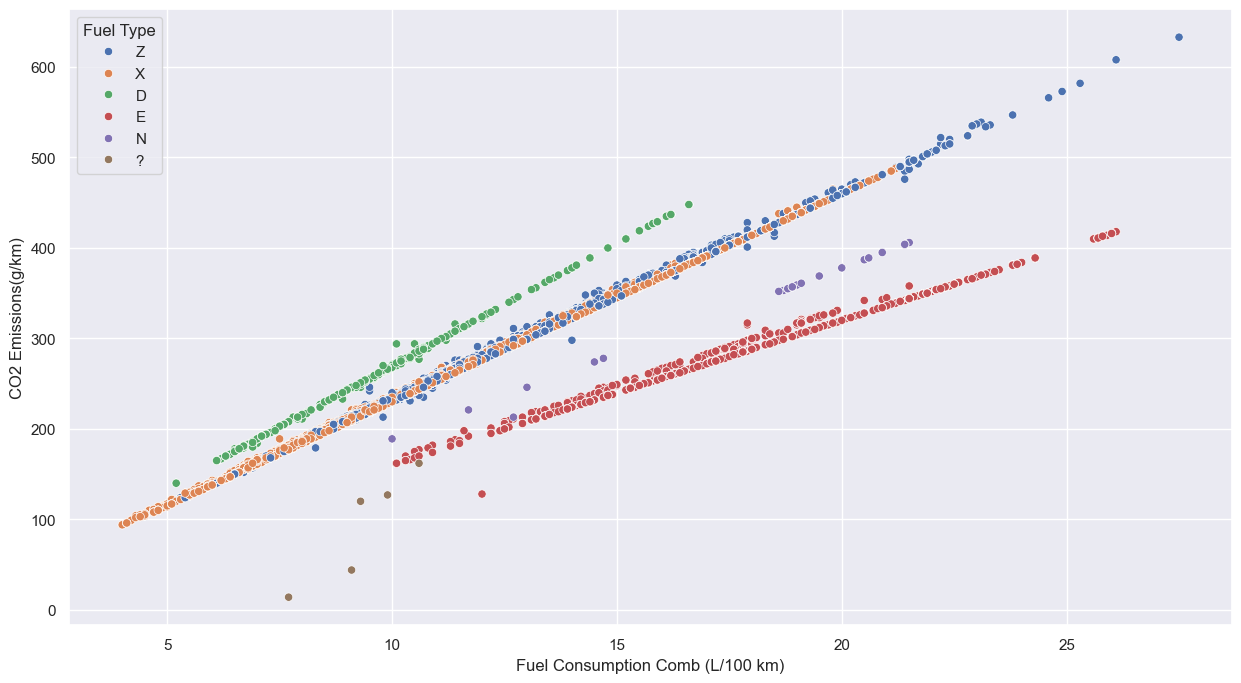

In [87]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#Отношение расхода топлива к выбросам CO2 c указанием типа топлива
#X-Бензин высокого качества
#Z-Бензин низкого качества
#D-дизель
#E-этанол
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

sns.scatterplot(data=df,x='Fuel Consumption Comb (L/100 km)', y='CO2 Emissions(g/km)', hue='Fuel Type')

<Axes: xlabel='Engine Size(L)', ylabel='CO2 Emissions(g/km)'>

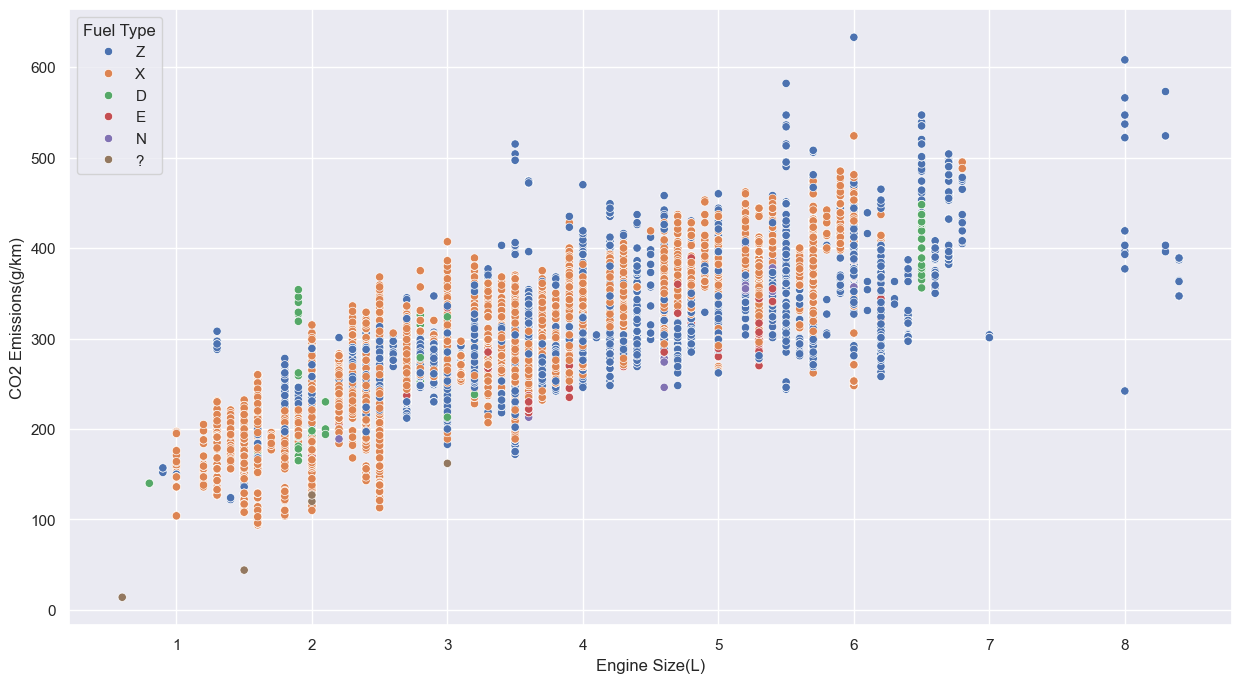

In [88]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#Отношение размера двигателя к выбросам CO2 c указанием типа топлива
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

sns.scatterplot(data=df,x='Engine Size(L)', y='CO2 Emissions(g/km)', hue='Fuel Type')

<Axes: xlabel='Year', ylabel='CO2 Emissions(g/km)'>

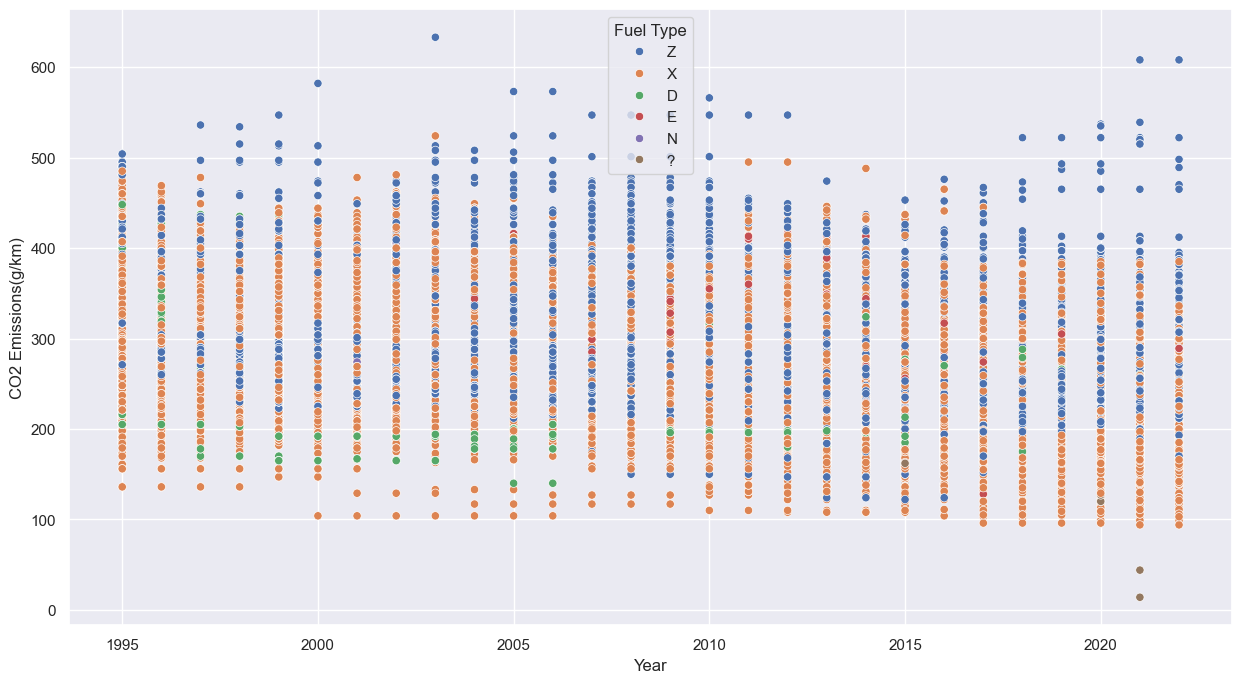

In [94]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#Отношение года выпуска размера двигателя к выбросам CO2 c указанием типа топлива
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

sns.scatterplot(data=df,x='Year', y='CO2 Emissions(g/km)', hue='Fuel Type')

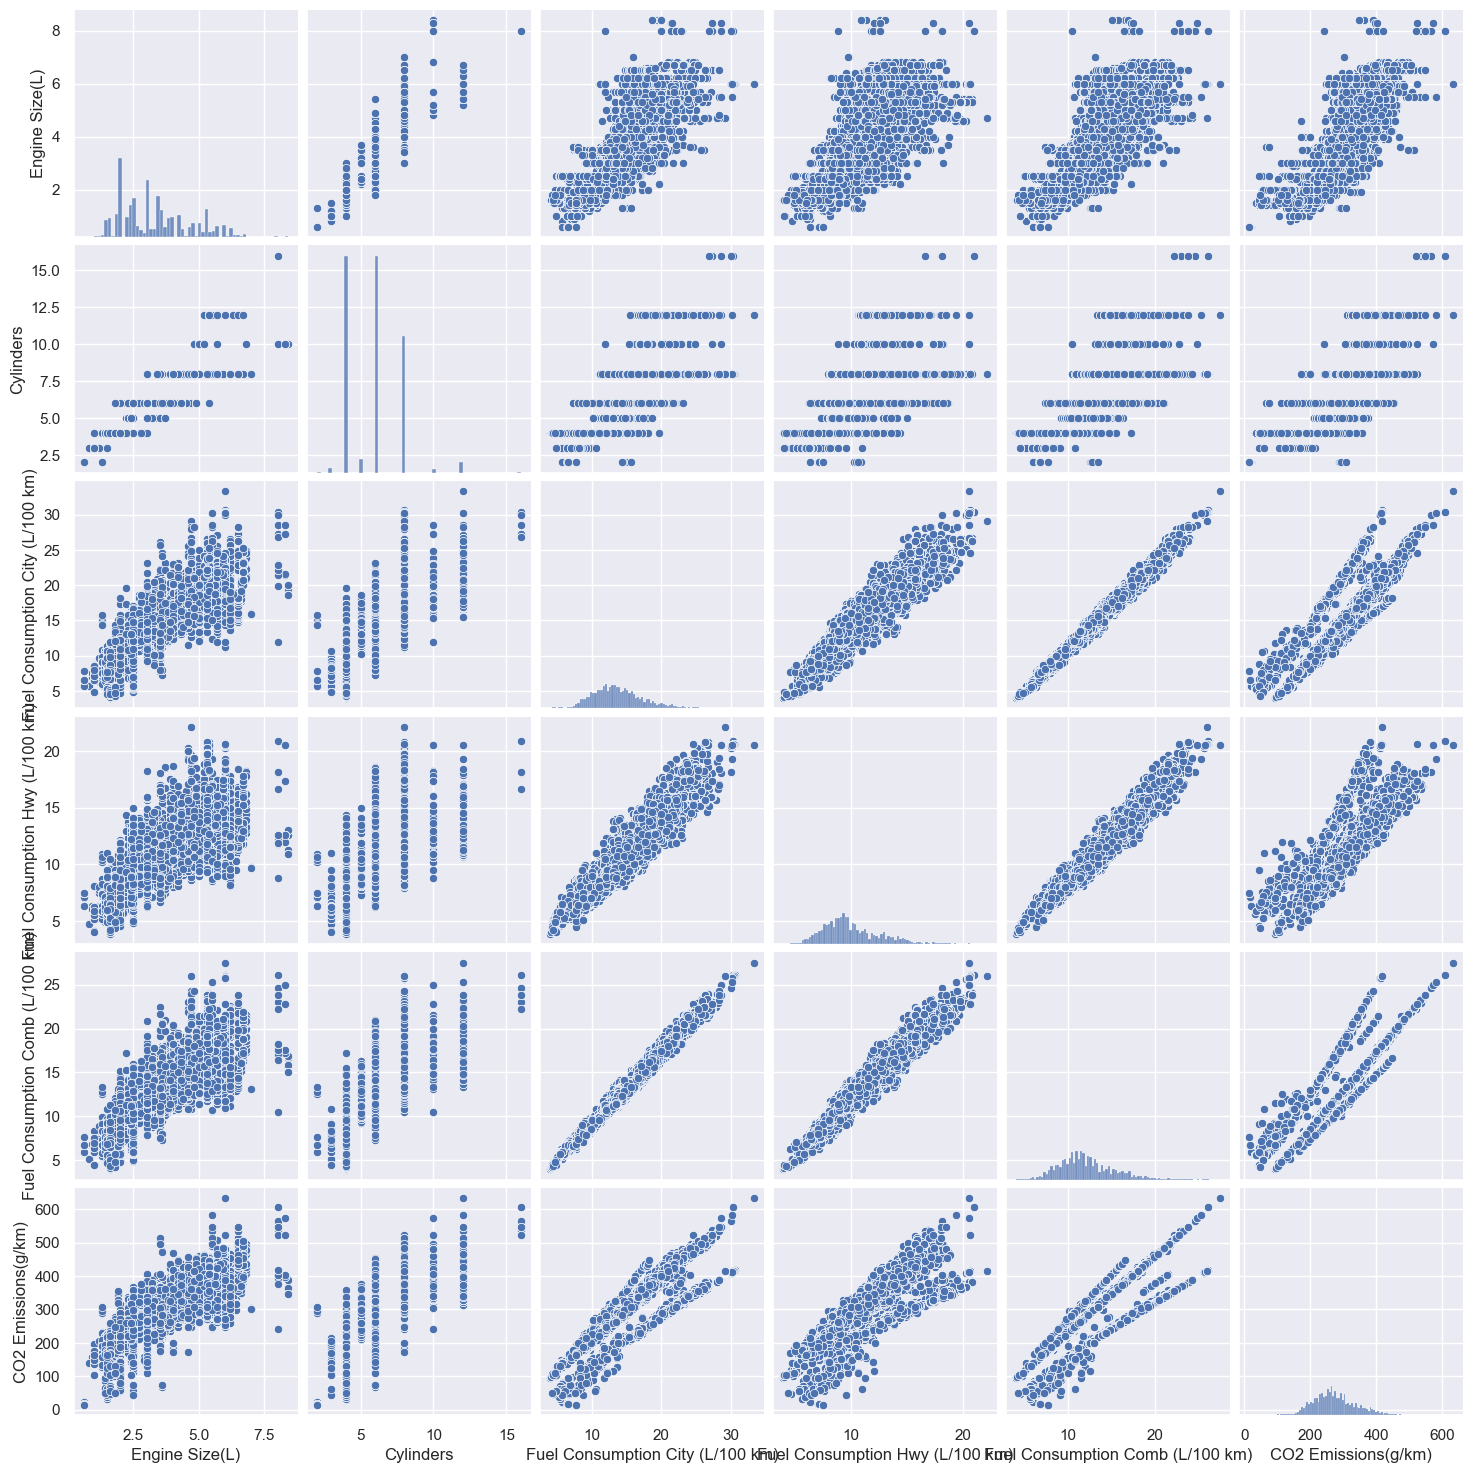

In [89]:
sns.pairplot(numdata)

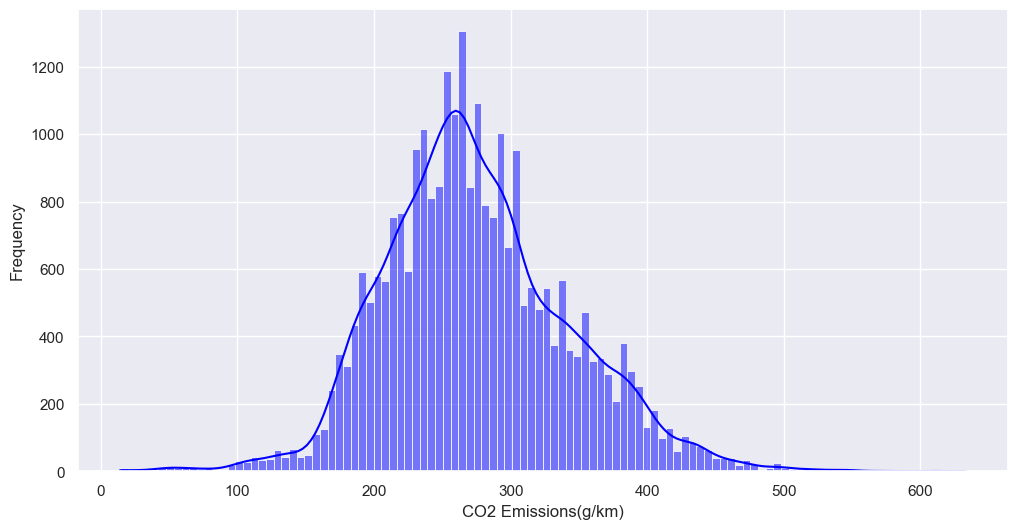

In [90]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#Распределение данных по выбросам CO2 в датасете
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

plt.figure(figsize=(12, 6))
sns.histplot(df['CO2 Emissions(g/km)'], kde=True, color='blue')
plt.xlabel('CO2 Emissions(g/km)')
plt.ylabel('Frequency')
plt.show()

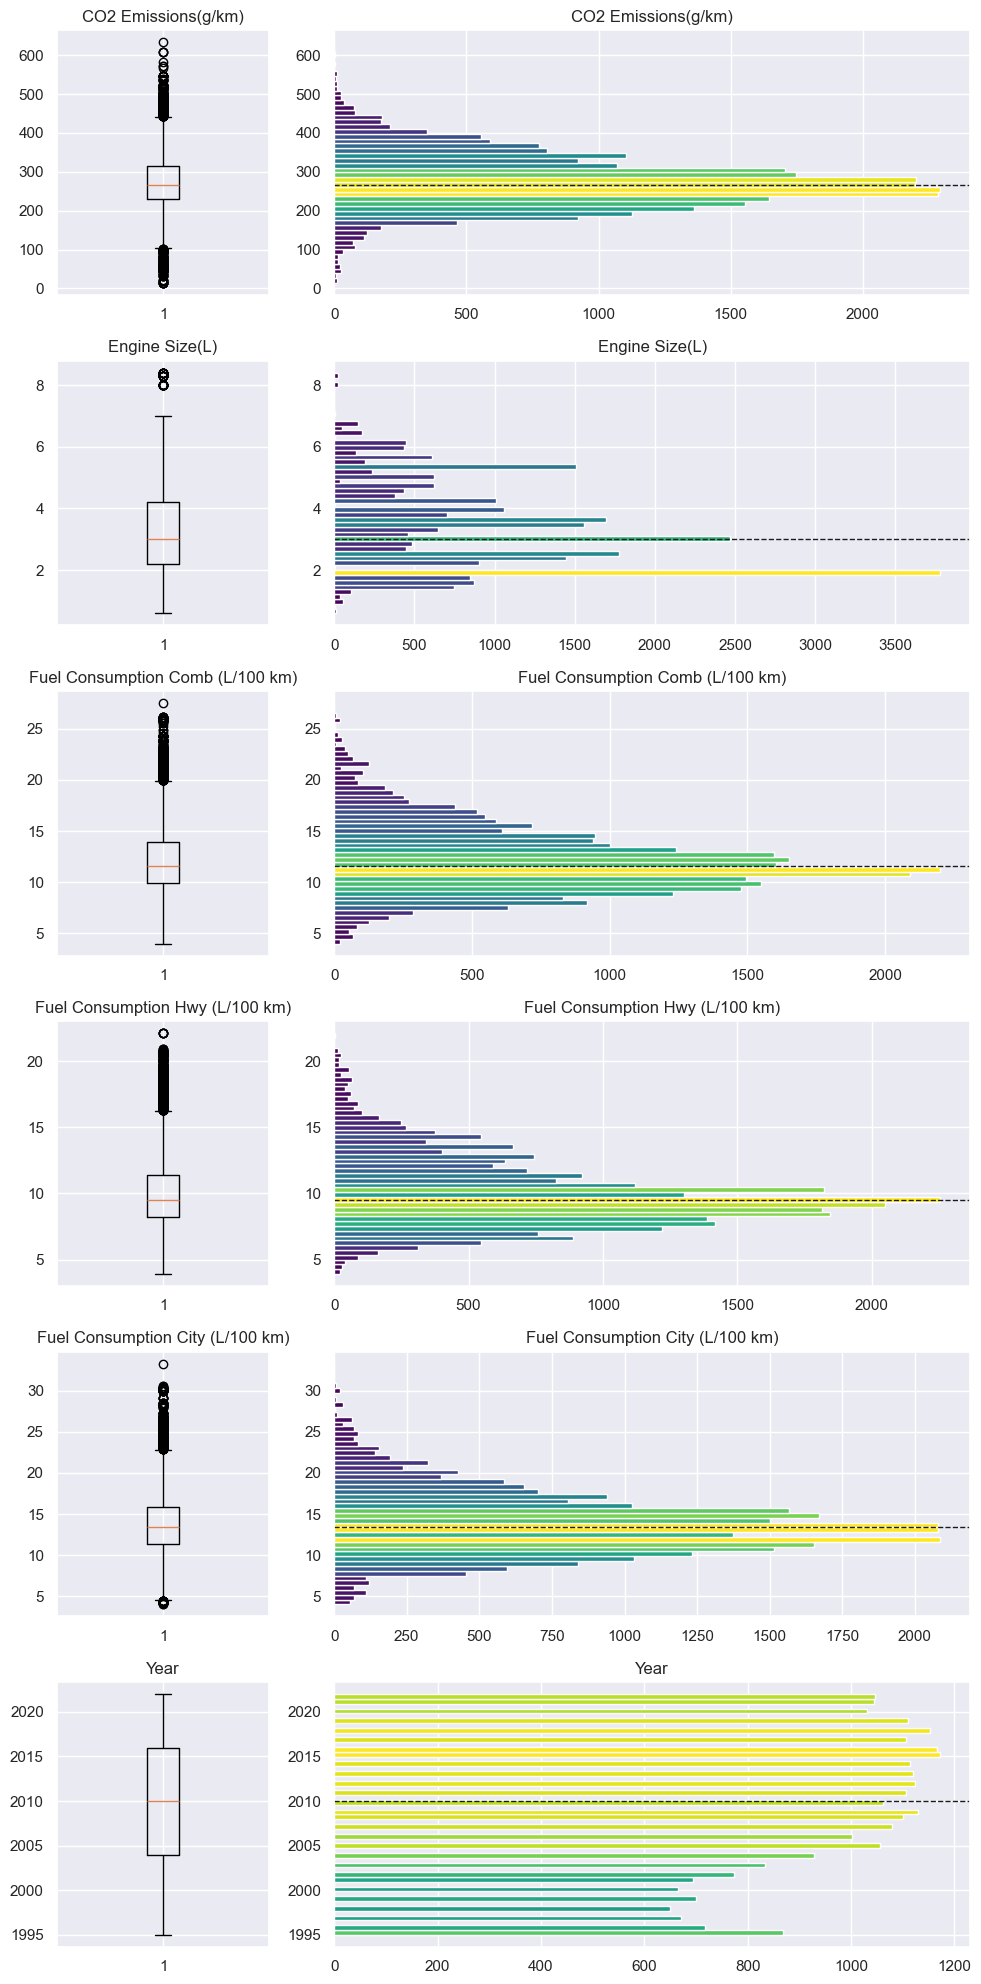

In [95]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#Ящики с усами
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


from matplotlib import colors
import statistics

fig, axs = plt.subplots(6, 2, width_ratios=[1, 3])
fig.set_figheight(20)
fig.set_figwidth(10)

'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)'

CommonFunc.draw_must_box(axs[0,0], axs[0,1], df, 'CO2 Emissions(g/km)')
CommonFunc.draw_must_box(axs[1,0], axs[1,1], df, 'Engine Size(L)')
CommonFunc.draw_must_box(axs[2,0], axs[2,1], df, 'Fuel Consumption Comb (L/100 km)')
CommonFunc.draw_must_box(axs[3,0], axs[3,1], df, 'Fuel Consumption Hwy (L/100 km)')
CommonFunc.draw_must_box(axs[4,0], axs[4,1], df, 'Fuel Consumption City (L/100 km)')
CommonFunc.draw_must_box(axs[5,0], axs[5,1], df, 'Year')


fig.tight_layout()

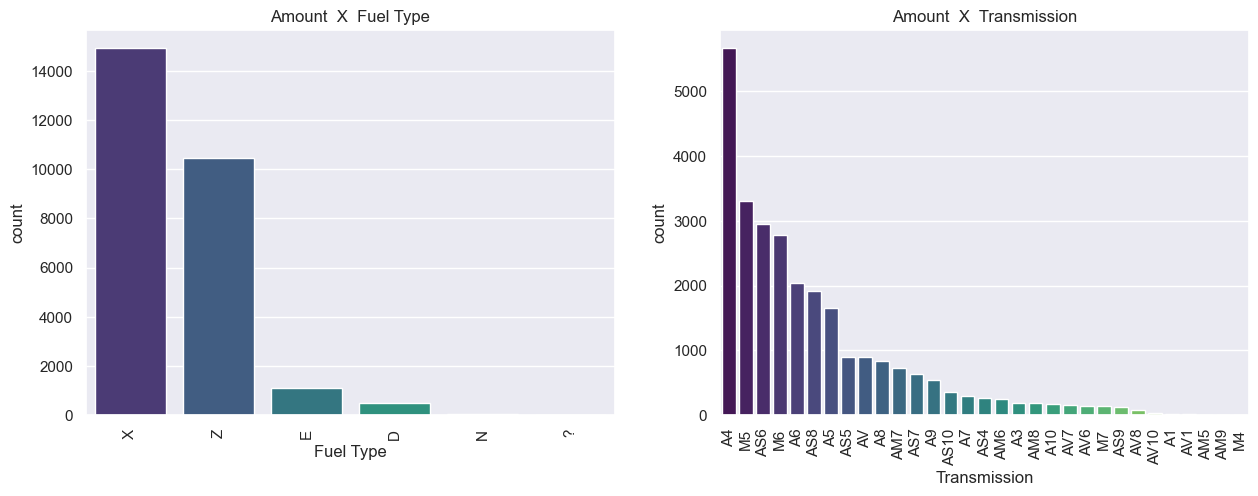

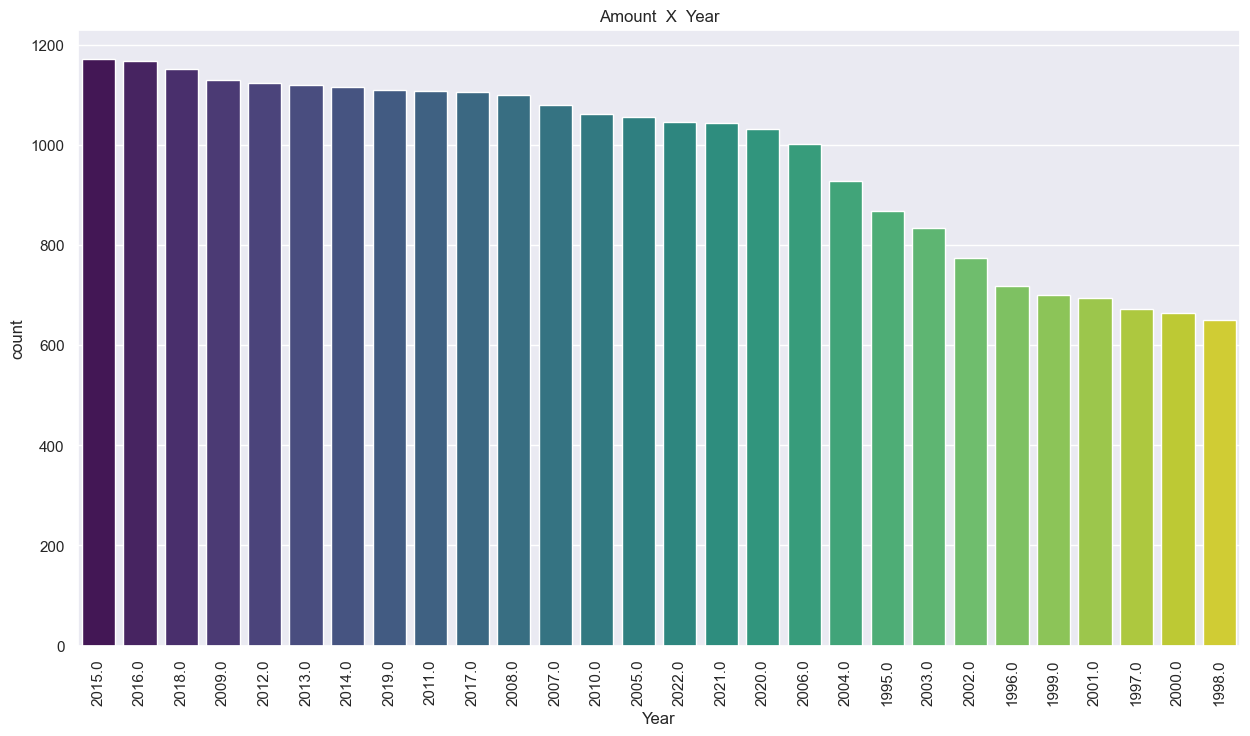

In [97]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#колличество данных в датасете для разных классов

#Transmission:
#A = Automatic
#AM = Automated manual
#AS = Automatic with select shift
#AV = Continuously variable
#M = Manual
#3 - 10 = Number of gears

#Fuel type
#X = Regular gasoline
#Z = Premium gasoline
#D = Diesel
#E = Ethanol (E85)
#N = Natural gas
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

import warnings
import numpy as np
warnings.filterwarnings('ignore')


def drawOneBarChart(axs, column):
    ax = sns.countplot(x=column, data=df, order=df[column].value_counts().index, ax = axs, palette='viridis', legend=False)
    ax.tick_params(axis='x', rotation=90)
    axs.title.set_text('Amount  X  ' + column)

fig, axs = plt.subplots(1, 2)
fig.set_figheight(5)
fig.set_figwidth(15)

drawOneBarChart(axs[1], 'Transmission')
drawOneBarChart(axs[0], 'Fuel Type')


fig, ax = plt.subplots()
fig.set_figwidth(15)
drawOneBarChart(ax, 'Year')
